<a href="https://colab.research.google.com/github/prakash-noah/Machine-Learning-IBM-db2_sql/blob/main/Outlier_detection%26removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#In statistics, an outlier is an observation point that is distant from other observations.
#There are two types of analysis we will follow to find the outliers- Uni-variate(one variable outlier analysis) and
#Multi-variate(two or more variable outlier analysis)."""

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_boston

In [ ]:
data = load_boston()
x = data.data 
y = data.target
print(data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [ ]:
columns = data.feature_names
columns 

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
df = pd.DataFrame(data.data)
df.columns = columns 
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df.shape 

(506, 13)

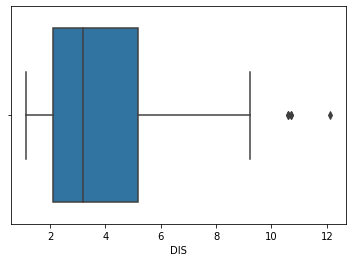

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.boxplot(x=df['DIS'])

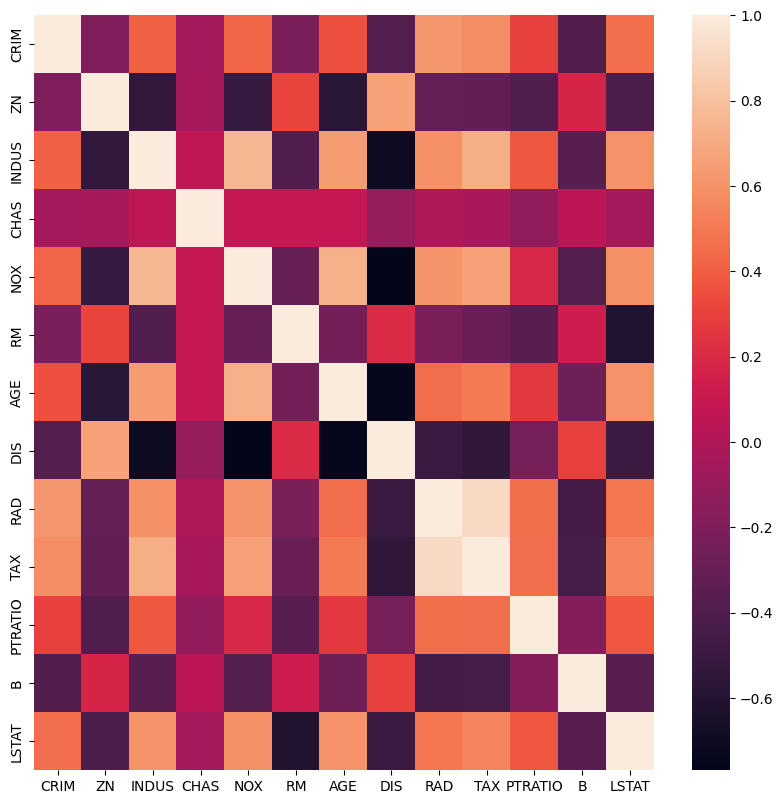

In [ ]:
plt.figure(figsize=(10,10),dpi=100)
sns.heatmap(df.corr())

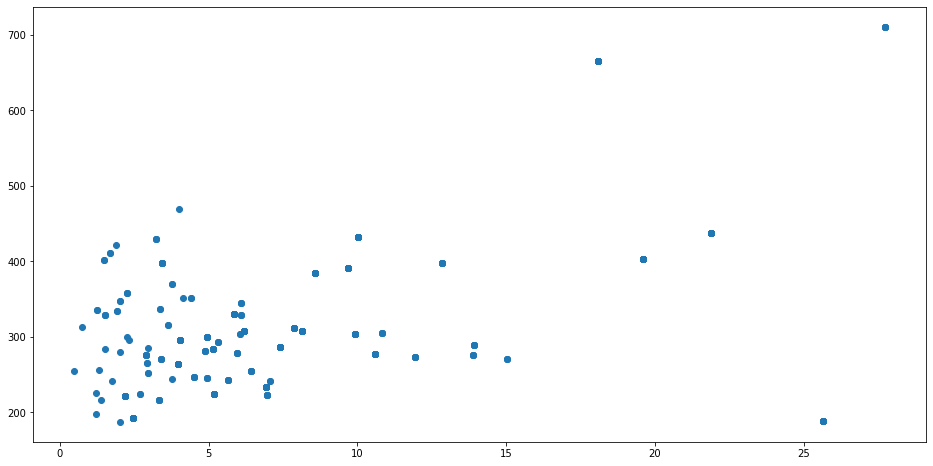

In [ ]:
#Multivariate outlier analysis
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['INDUS'], df['TAX'])
plt.show()

In [ ]:
#The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and 
#Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 
#and standard deviation is 1 i.e. normal distribution.

In [ ]:
from scipy import stats 
z = np.abs(stats.zscore(df))

In [ ]:
z

array([[0.41978194, 0.28482986, 1.2879095 , ..., 1.45900038, 0.44105193,
        1.0755623 ],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.30309415, 0.44105193,
        0.49243937],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.30309415, 0.39642699,
        1.2087274 ],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.98304761],
       [0.40776407, 0.48772236, 0.11573841, ..., 1.17646583, 0.4032249 ,
        0.86530163],
       [0.41500016, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.66905833]])

In [ ]:
th = 3
print(np.where(z > th))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [ ]:
#The first array contains the list of row numbers and second array respective column numbers,
#which mean z[55][1] have a Z-score higher than 3.

In [ ]:
print(z[55][1])

3.375038763517309


In [ ]:
#interquartile range (IQR)
#IQR = Q3 − Q1
#the IQR is the first quartile subtracted from the third quartile;

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64

In [ ]:
#a data point is an outlier if it is more than 1.5.

In [ ]:
print(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))))

      CRIM     ZN  INDUS   CHAS    NOX  ...    RAD    TAX  PTRATIO      B  LSTAT
0    False  False  False  False  False  ...  False  False    False  False  False
1    False  False  False  False  False  ...  False  False    False  False  False
2    False  False  False  False  False  ...  False  False    False  False  False
3    False  False  False  False  False  ...  False  False    False  False  False
4    False  False  False  False  False  ...  False  False    False  False  False
..     ...    ...    ...    ...    ...  ...    ...    ...      ...    ...    ...
501  False  False  False  False  False  ...  False  False    False  False  False
502  False  False  False  False  False  ...  False  False    False  False  False
503  False  False  False  False  False  ...  False  False    False  False  False
504  False  False  False  False  False  ...  False  False    False  False  False
505  False  False  False  False  False  ...  False  False    False  False  False

[506 rows x 13 columns]


In [ ]:
new_df = df[(z < 3).all(axis=1)]
new_df.shape

(415, 13)

In [ ]:
new_df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
new_df1.shape

(274, 13)